('Keimosaurus Big Spin', 18790)
('Galactosaurus Rage', 18715)
('Wrightiraptor Mountain', 18695)
('Auvilotops Express', 18686)
('Atmosfear', 18266)
('Flight of the Swingodon', 16060)
('Firefall', 15999)
('Wendisaurus Chase', 15574)
('TerrorSaur', 14401)


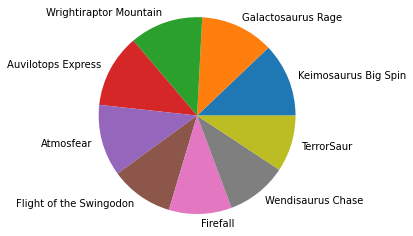

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

db_filename = 'dinofunworld-1.db'
conn = sqlite3.connect(db_filename)
c = conn.cursor()

c.execute("select name,count(VisitorID) as count from checkin as ch, attraction as att where ch.type='actual' and attraction=AttractionID and category like '%Thrill Rides%' group by name order by count desc;")
counts = c.fetchall()

for row in counts:
    print(row)

visitStats = pd.DataFrame.from_records(counts, columns=['name', 'count'])
plt.pie(visitStats['count'],labels=visitStats['name'],shadow=False)
plt.axis('equal')
plt.show()

('Chensational Sweets', 3049)
('EberTrex Fries', 3018)
('Floral Funnels', 3083)
('Granite Slab Pizza', 2810)
('Ice Age Cones', 3228)
('Krystal Cook Cafe', 1725)
('Paleo Shreckwiches', 1361)
('Permafrosties', 3018)
('Plaisantly Popped Corn', 2914)
("Shilobite o'Pizza", 1393)
('Smoky Wood BBQ', 3037)
('Theresaur Food Stop', 1116)


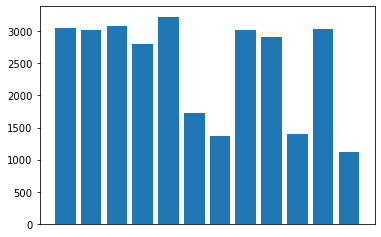

In [3]:
c.execute(" select name,count(VisitorID) as count from checkin as ch, attraction as att where attraction=AttractionID and category like '%food%' group by name;")
eatingData = c.fetchall()
for row in eatingData:
    print(row)

eatFrame = pd.DataFrame.from_records(eatingData,columns=['name','count'])
plt.bar(range(len(eatFrame['name'])),eatFrame['count'])
plt.xticks([])
plt.show()

(9, 998)
(10, 1840)
(11, 1568)
(12, 1685)
(13, 1688)
(14, 1750)
(15, 1446)
(16, 1218)
(17, 1479)
(18, 1450)
(19, 1102)
(20, 973)
(21, 625)
(22, 309)
(23, 135)


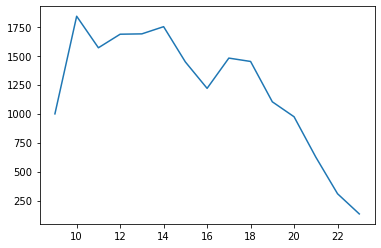

In [23]:
import matplotlib.pyplot as plt
import numpy as np

c.execute("select strftime('%H',timestamp)+1 as ckhour,count(strftime('%H',timestamp)) as count from checkin as ch,attraction where ch.type='actual' and attraction=AttractionID and name='Atmosfear' group by ckhour order by ckhour;")
visitData=c.fetchall()

for row in visitData:
    print(row)

fig, ax = plt.subplots()  # Create a figure containing a single axes.
visitFrame = pd.DataFrame.from_records(visitData,columns=['ckhour','count'])
ax.plot(visitFrame['ckhour'], visitFrame['count'])  # Plot some data on the axes.
plt.show()

('North Line', 3589)
('Flying TyrAndrienkos', 3632)
('Cyndisaurus Asteroid', 3742)
('Enchanted Toadstools', 3744)
('Jeredactyl Jump', 3751)
('Stone Cups', 3867)
('Blue Iguanodon', 3916)
('Stegocycles', 3919)
('Beelzebufo', 3963)
('Wild Jungle Cruise', 4016)
('Sauroma Bumpers', 4052)


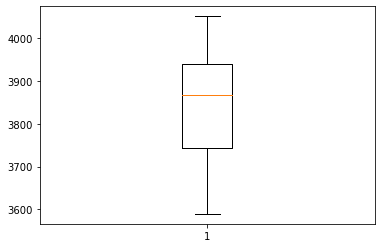

In [25]:
c.execute("select name,count(VisitorID) as count from checkin as ch,attraction where ch.type='actual'and attraction=AttractionID and category like '%Kiddie Rides%' group by name order by count;")
visitByMan = c.fetchall() 

for row in visitByMan:
    print(row)

visitBoxFrame =pd.DataFrame.from_records(visitByMan,columns=['name', 'count'])
plt.boxplot(visitBoxFrame['count'])
plt.show()